In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import style
style.use('dark_background')

In [2]:
#Importing the dataset
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.shape

(10000, 14)

## EDA

In [4]:
#Let's take a look at our dataset first
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


For our Deep Learning model, the columns RowNumber, CustomerId and Surname are irrelevant. Let's drop them.

In [5]:
df.drop(['RowNumber','CustomerId','Surname'],axis='columns',inplace=True)

In [6]:
#Let's look at our dataset now
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5915,679,France,Male,47,10,198546.10,2,1,0,191198.92,1
5312,712,Spain,Female,48,8,0.00,2,1,0,183235.33,0
1675,784,Spain,Male,33,10,0.00,2,1,0,162022.47,0
9450,666,Germany,Male,33,2,124125.26,1,1,0,81884.80,0
7323,742,Spain,Male,24,8,0.00,2,1,0,4070.28,0


In [7]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Let's take a look at the null values, if any

In [8]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Great! No null values

The unique values of the features will provide us some insight on what steps to take next. Let's examine them

In [9]:
for column in df:
    print(f'{column} : {df[column].unique()}')

CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 

Let's see the relation between credit score and churns

In [10]:
import seaborn as sns

<AxesSubplot:xlabel='CreditScore', ylabel='Count'>

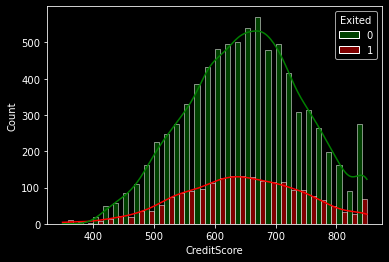

In [11]:
sns.histplot(data=df,x='CreditScore',hue='Exited',palette=['green','red'],multiple='dodge',bins=30,kde=True)

Maximum number of people leaving have a relatively average credit score.

Now, let's explore the relationship between Estimated salary and Exits.

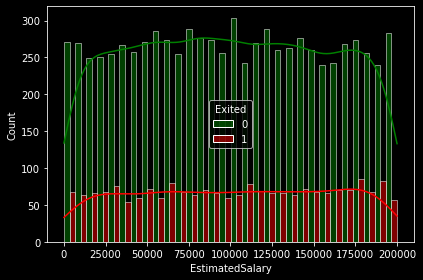

In [12]:
sns.histplot(data=df,x='EstimatedSalary',hue='Exited',palette=['green','red'],multiple='dodge',bins=30,kde=True)
plt.tight_layout()

No valuable insights.

Let us now look at the relationship of Exits with tenure,balance and age.

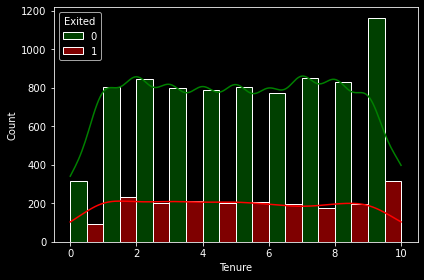

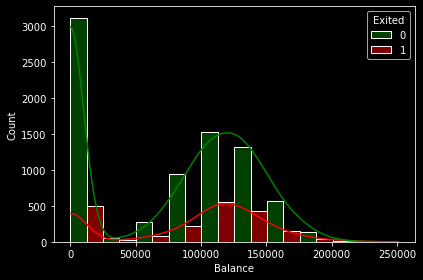

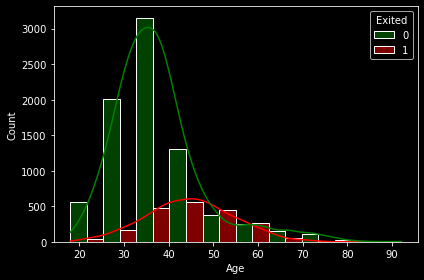

In [13]:
for col in ["Tenure","Balance", "Age"]:
    sns.histplot(data=df,x=col,hue='Exited',palette=['green','red'],multiple='dodge',bins=10,kde=True)
    plt.tight_layout()
    plt.show()

We are able to observe a normal distribution in most of the cases

### Data Preprocessing
Now, we would like to convert the columns with "object" data-types into numeric values, so that we can feed it to our model.

We would also like to scale the values, as it will provide us with better results

In [14]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [15]:
for column in df:
    print(f'{column} : {df[column].unique()}')

CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 

Gender has only two unique values. We can convert it to numeric form by simply using 1 and 0.

For Geography and NumberOfProducts, we will use one hot categorization

In [16]:
df['Gender'].replace({"Female":1,"Male":0},inplace=True)

In [17]:
df = pd.get_dummies(data=df, columns=['Geography','NumOfProducts'])

In [18]:
for column in df:
    print(f'{column} : {df[column].unique()}')

CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 

In [19]:
df.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
146,635,1,29,8,138296.94,1,0,141075.51,0,0,0,1,0,1,0,0
1816,531,0,29,3,114590.58,0,0,75585.48,0,1,0,0,1,0,0,0
8075,850,0,58,8,156652.13,0,0,25899.21,1,1,0,0,1,0,0,0
121,674,0,39,6,120193.42,0,0,100130.95,0,0,0,1,1,0,0,0
9333,755,1,78,5,121206.96,1,1,76016.49,0,1,0,0,1,0,0,0


In [23]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary'] #The columns that we need to scale

#We are using MinMaxScaler from scikit-learn library for this purpose
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [24]:
df.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
6542,0.482,0,0.229730,0.7,0.729488,1,1,0.280113,0,1,0,0,1,0,0,0
3289,0.846,1,0.067568,0.8,0.000000,1,0,0.283768,0,0,0,1,0,1,0,0
9665,0.394,0,0.162162,0.6,0.000000,1,1,0.092310,0,1,0,0,0,1,0,0
5655,0.690,0,0.608108,0.1,0.582718,1,1,0.633447,1,0,0,1,1,0,0,0
5092,0.676,1,0.283784,0.0,0.000000,1,0,0.266078,1,1,0,0,0,1,0,0


Nice, now all the values are scaled and numeric.

Let's head on to building and training our model now.

## Train-Test Split

In [26]:
X= df.drop('Exited',axis=1)
y=df.Exited

In [27]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,0.538,1,0.324324,0.2,0.000000,1,1,0.506735,1,0,0,1,0,0,0
1,0.516,1,0.310811,0.1,0.334031,0,1,0.562709,0,0,1,1,0,0,0
2,0.304,1,0.324324,0.8,0.636357,1,0,0.569654,1,0,0,0,0,1,0
3,0.698,1,0.283784,0.1,0.000000,0,0,0.469120,1,0,0,0,1,0,0
4,1.000,1,0.337838,0.2,0.500246,1,1,0.395400,0,0,1,1,0,0,0


In [28]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [33]:
#Let's take a look atour training dataset
X_train.sample(4)

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
7318,0.564,1,0.189189,0.1,0.000000,1,0,0.097580,0,0,1,0,1,0,0
1102,0.164,0,0.270270,0.7,0.000000,1,0,0.752918,0,0,1,0,1,0,0
8197,0.534,0,0.486486,0.6,0.407105,1,1,0.226590,1,0,0,1,0,0,0
1753,0.490,1,0.067568,1.0,0.403059,0,0,0.185174,0,0,1,0,1,0,0


In [34]:
y_train.sample(4)

697     1
2402    0
1675    0
4308    0
Name: Exited, dtype: int64

## Building and Training the model

In [36]:
X_train.shape

(6700, 15)

In [35]:
import tensorflow as tf
from tensorflow import keras

In [48]:
model = keras.Sequential([
    keras.layers.Dense(500,input_shape=(15,),activation='relu'),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=80)

Epoch 1/80
210/210 [==============================] - 0s 798us/step - loss: 0.4127 - accuracy: 0.8266
Epoch 2/80
210/210 [==============================] - 0s 761us/step - loss: 0.3743 - accuracy: 0.8415
Epoch 3/80
210/210 [==============================] - 0s 778us/step - loss: 0.3658 - accuracy: 0.8458
Epoch 4/80
210/210 [==============================] - 0s 769us/step - loss: 0.3595 - accuracy: 0.8484
Epoch 5/80
210/210 [==============================] - 0s 764us/step - loss: 0.3564 - accuracy: 0.8482
Epoch 6/80
210/210 [==============================] - 0s 768us/step - loss: 0.3509 - accuracy: 0.8504
Epoch 7/80
210/210 [==============================] - 0s 781us/step - loss: 0.3490 - accuracy: 0.8507
Epoch 8/80
210/210 [==============================] - 0s 767us/step - loss: 0.3460 - accuracy: 0.8537
Epoch 9/80
210/210 [==============================] - 0s 759us/step - loss: 0.3431 - accuracy: 0.8558
Epoch 10/80
210/210 [==============================] - 0s 756us/step - loss: 0.345

210/210 [==============================] - 0s 779us/step - loss: 0.1575 - accuracy: 0.9324


93.2% Accuracy! Our model is performing exceptionally well on training dataset. Let's hope the same for our test dataset :)

In [49]:
model.evaluate(X_test,y_test)

104/104 [==============================] - 0s 481us/step - loss: 0.5362 - accuracy: 0.8455


[0.5362126231193542, 0.8454545736312866]

As we can see, the model is performing well on the test dataset too!

Now, let's evaluate the performance using confusion matrix

In [63]:
#First, let's collect the predicted values
yp = model.predict(X_test)

In [65]:
y_pred = []
for e in yp:
    if e>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred[:5]

[0, 0, 0, 0, 0]

In [66]:
y_test[:5]

6252    0
4684    0
1731    0
4742    0
4521    0
Name: Exited, dtype: int64

In [50]:
from sklearn.metrics import confusion_matrix,classification_report

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      2657
           1       0.63      0.49      0.55       643

    accuracy                           0.85      3300
   macro avg       0.76      0.71      0.73      3300
weighted avg       0.83      0.85      0.84      3300



In [68]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[2472,  185],
       [ 325,  318]], dtype=int64)

Text(33.0, 0.5, 'Actual')

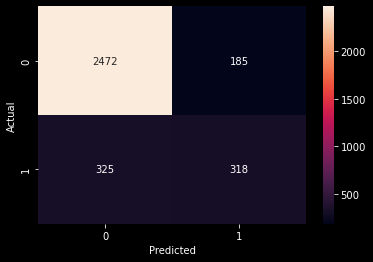

In [72]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")

Our model has 85% Accuracy, which means that it is performing well and we can deploy it!